# One-Class Random Forest

### Modelo 1 - Frequency of words

##### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import feather

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

#### Read FTR

In [3]:
#read ftr
data = pd.read_feather( '../output/dataframe1.ftr', columns=None, use_threads=True)

In [4]:
data_y = data['polarityClass']
data = data.drop(columns=['polarityClass']) 
data.head()

,like,good,one,taste,great,coffee,flavor,tea,product,love,...,maxes,pliers,offshoot,distinctively,brilliance,auspices,synonyms,cowards,lofted,parachute
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
trainX, testX, trainy, testy = train_test_split(data, data_y, test_size=0.3, random_state=2)

In [6]:
testy.dtypes

dtype('uint8')

In [7]:
trainy = trainy.astype('int8')
print(trainy.dtypes)

int8


In [8]:
testy = testy.astype('int8')
print(testy.dtypes)

int8


In [9]:
trainy[trainy != 0] = -1 #anomaly
trainy[trainy == 0] = 1 #normal

testy[testy != 0] = -1 #anomaly
testy[testy == 0] = 1 #normal

In [10]:
testy.value_counts()

-1    12832
 1     2041
Name: polarityClass, dtype: int64

In [11]:
trainy.value_counts()

-1    30021
 1     4682
Name: polarityClass, dtype: int64

### Check for lower errors

In [12]:
error_rate = []

for i in tqdm(range(1,150)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(trainX,trainy)
    predictions = clf.predict(testX)
    error_rate.append(np.mean(predictions != testy))

100%|█████████████████████████████████████████████████████████████████████████████| 149/149 [6:32:25<00:00, 158.02s/it]


Text(0, 0.5, 'Error Rate')

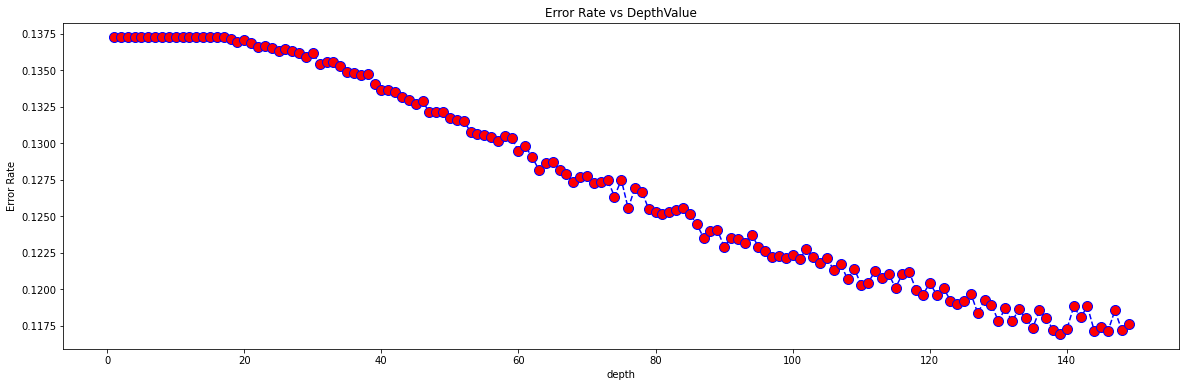

In [13]:
plt.figure(figsize=(20,6))
plt.plot(range(1,150),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

### Hyperparameter tuning using GridSearchCV

In [15]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [139],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=10)

# Fit the model
opt_model_rf.fit(trainX, trainy)

print (opt_model_rf.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5; 1/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 1/5; 1/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   6.6s
[CV 2/5; 1/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 2/5; 1/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   6.5s
[CV 3/5; 1/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 1/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   6.6s
[CV 4/5; 1/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[C

[CV 1/5; 7/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   7.6s
[CV 2/5; 7/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 2/5; 7/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.5s
[CV 3/5; 7/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 7/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.6s
[CV 4/5; 7/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 7/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.8s
[CV 5/5; 7/72] START bootstrap=True, ma

[CV 1/5; 13/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   6.8s
[CV 2/5; 13/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 2/5; 13/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   6.4s
[CV 3/5; 13/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 13/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   6.6s
[CV 4/5; 13/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 13/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   6.7s
[CV 5/5; 13/72] START bootstrap=True, m

[CV 2/5; 19/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.4s
[CV 3/5; 19/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 19/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   7.7s
[CV 4/5; 19/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 19/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.9s
[CV 5/5; 19/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 19/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.9s
[CV 1/5; 20/72] START bootstrap=

[CV 2/5; 25/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   8.4s
[CV 3/5; 25/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 25/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   8.2s
[CV 4/5; 25/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 25/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   8.0s
[CV 5/5; 25/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 25/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   8.1s
[CV 1/5; 26/72] START bootstrap=True, m

[CV 2/5; 31/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.8s
[CV 3/5; 31/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 31/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   8.5s
[CV 4/5; 31/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 31/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.9s
[CV 5/5; 31/72] START bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 31/72] END bootstrap=True, max_depth=139, max_features=2, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.6s
[CV 1/5; 32/72] START bootstrap=

[CV 2/5; 37/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   6.4s
[CV 3/5; 37/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 3/5; 37/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   8.1s
[CV 4/5; 37/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 4/5; 37/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   8.5s
[CV 5/5; 37/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 5/5; 37/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   7.9s
[CV 1/5; 38/72] START bootstrap=True, m

[CV 2/5; 43/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.7s
[CV 3/5; 43/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 3/5; 43/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.3s
[CV 4/5; 43/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 4/5; 43/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   8.7s
[CV 5/5; 43/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300
[CV 5/5; 43/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   9.0s
[CV 1/5; 44/72] START bootstrap=

[CV 2/5; 49/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   7.7s
[CV 3/5; 49/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 3/5; 49/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   7.6s
[CV 4/5; 49/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 4/5; 49/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   7.1s
[CV 5/5; 49/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100
[CV 5/5; 49/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=   7.0s
[CV 1/5; 50/72] START bootstrap=True, m

[CV 2/5; 55/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.8s
[CV 3/5; 55/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 3/5; 55/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.9s
[CV 4/5; 55/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 4/5; 55/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.6s
[CV 5/5; 55/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300
[CV 5/5; 55/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   9.4s
[CV 1/5; 56/72] START bootstrap=

[CV 2/5; 61/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   7.4s
[CV 3/5; 61/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 3/5; 61/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   7.3s
[CV 4/5; 61/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 4/5; 61/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   7.4s
[CV 5/5; 61/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 5/5; 61/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   6.4s
[CV 1/5; 62/72] START bootstrap=True, m

[CV 2/5; 67/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   9.1s
[CV 3/5; 67/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 3/5; 67/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   8.7s
[CV 4/5; 67/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 4/5; 67/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   8.9s
[CV 5/5; 67/72] START bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300
[CV 5/5; 67/72] END bootstrap=True, max_depth=139, max_features=3, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   8.3s
[CV 1/5; 68/72] START bootstrap=

### Create and fit the model CLASS 0

In [20]:
# Create model with best parameters
model = RandomForestClassifier(max_depth=139)#, max_features=2, min_samples_leaf=3,min_samples_split=8)

# Fit the best model
model.fit(trainX,trainy)
model

RandomForestClassifier(max_depth=139)

In [21]:
predictions = model.predict(testX)# Calculate the absolute errors

# Confusion matrix
confusion = pd.crosstab(testy,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     -1    1    All
Actual                      
-1         12816   16  12832
1           1720  321   2041
All        14536  337  14873


In [22]:
# Accuracy
score = accuracy_score(testy,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.883278


In [23]:
# Report
print(classification_report(testy,predictions))

              precision    recall  f1-score   support

          -1       0.88      1.00      0.94     12832
           1       0.95      0.16      0.27      2041

    accuracy                           0.88     14873
   macro avg       0.92      0.58      0.60     14873
weighted avg       0.89      0.88      0.85     14873



#### Read FTR

In [24]:
#read ftr
data2 = pd.read_feather( '../output/dataframe1.ftr', columns=None, use_threads=True)

In [25]:
data2_y = data2['polarityClass']
data2 = data2.drop(columns=['polarityClass']) 
data2.head()

,like,good,one,taste,great,coffee,flavor,tea,product,love,...,maxes,pliers,offshoot,distinctively,brilliance,auspices,synonyms,cowards,lofted,parachute
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
train2X, test2X, train2y, test2y = train_test_split(data2, data2_y, test_size=0.3, random_state=2)

In [27]:
train2y = train2y.astype('int8')
print(train2y.dtypes)

int8


In [28]:
test2y = test2y.astype('int8')
print(test2y.dtypes)

int8


In [29]:
train2y[train2y != 1] = -1 #anomaly
train2y[train2y == 1] = 1 #normal

test2y[test2y != 1] = -1 #anomaly
test2y[test2y == 1] = 1 #normal

In [30]:
test2y.value_counts()

-1    13773
 1     1100
Name: polarityClass, dtype: int64

In [31]:
train2y.value_counts()

-1    32193
 1     2510
Name: polarityClass, dtype: int64

### Create and fit the model CLASS 1

In [32]:
# Create model with best parameters
model = RandomForestClassifier(max_depth=139)

# Fit the best model
model.fit(train2X,train2y)
model

RandomForestClassifier(max_depth=139)

In [33]:
predictions = model.predict(test2X)# Calculate the absolute errors

# Confusion matrix
confusion = pd.crosstab(test2y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted     -1   1    All
Actual                     
-1         13772   1  13773
1           1047  53   1100
All        14819  54  14873


In [34]:
# Accuracy
score = accuracy_score(test2y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.929537


In [35]:
# Report
print(classification_report(test2y,predictions))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96     13773
           1       0.98      0.05      0.09      1100

    accuracy                           0.93     14873
   macro avg       0.96      0.52      0.53     14873
weighted avg       0.93      0.93      0.90     14873



#### Read FTR

In [36]:
#read ftr
data3 = pd.read_feather( '../output/dataframe1.ftr', columns=None, use_threads=True)

In [37]:
data3_y = data3['polarityClass']
data3 = data3.drop(columns=['polarityClass']) 
data3.head()

,like,good,one,taste,great,coffee,flavor,tea,product,love,...,maxes,pliers,offshoot,distinctively,brilliance,auspices,synonyms,cowards,lofted,parachute
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,3,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
train3X, test3X, train3y, test3y = train_test_split(data3, data3_y, test_size=0.3, random_state=2)

In [39]:
train3y = train3y.astype('int8')
print(train3y.dtypes)

int8


In [40]:
test3y = test3y.astype('int8')
print(test3y.dtypes)

int8


In [41]:
train3y[train3y != 2] = -1 #anomaly
train3y[train3y == 2] = 1 #normal

test3y[test3y != 2] = -1 #anomaly
test3y[test3y == 2] = 1 #normal

In [42]:
test3y.value_counts()

 1    11732
-1     3141
Name: polarityClass, dtype: int64

In [43]:
train3y.value_counts()

 1    27511
-1     7192
Name: polarityClass, dtype: int64

### Create and fit the model CLASS 2

In [44]:
# Create model with best parameters
model = RandomForestClassifier(max_depth=139)

# Fit the best model
model.fit(train3X,train3y)
model

RandomForestClassifier(max_depth=139)

In [45]:
predictions = model.predict(test3X)# Calculate the absolute errors

# Confusion matrix
confusion = pd.crosstab(test3y,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

Predicted   -1      1    All
Actual                      
-1         752   2389   3141
1           59  11673  11732
All        811  14062  14873


In [46]:
# Accuracy
score = accuracy_score(test3y,predictions)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.835406


In [47]:
# Report
print(classification_report(test3y,predictions))

              precision    recall  f1-score   support

          -1       0.93      0.24      0.38      3141
           1       0.83      0.99      0.91     11732

    accuracy                           0.84     14873
   macro avg       0.88      0.62      0.64     14873
weighted avg       0.85      0.84      0.79     14873

